split data for every zone
===


In [57]:
import numpy as np
from numpy import genfromtxt
from learning_model import *
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
#from ann_visualizer.visualize import ann_viz
import config
import pandas as pd


In [58]:
#read the zone in every points on field(need to change below because pci need to be predict result and add zone)
pci_result_zone = np.genfromtxt('pci_result_nozone.csv', delimiter=',')
print (pci_result_zone)
pci_result_zone_pd = pd.DataFrame(pci_result_zone,columns=['x','y','pci','zone'])
pci_result_zone_pd.to_csv('pci_result_zone_pd.csv')
#print (pci_result_zone_pd)
#read the raw data 
train_part_test = np.genfromtxt('set3_part_train.csv', delimiter=',')
pixel_pos = np.genfromtxt('pixel_pos.csv', delimiter=',')
data_test = np.genfromtxt('rem_test.csv', delimiter=',')
print (train_part_test)
print (data_test)
print (pixel_pos[1:,:])

[[  0.   0.  39.   0.]
 [  1.   0.  39.   0.]
 [  2.   0.  39.   0.]
 ...
 [102.  26.  42.   0.]
 [103.  26.  42.   0.]
 [104.  26.  42.   0.]]
[[   6.9175     12.3145     39.       -116.585714   61.29802     3.      ]
 [   6.9745     14.566      39.       -119.691304   61.273117    3.      ]
 [   7.147      16.696      37.       -115.         17.578927    1.      ]
 ...
 [ 101.974      15.3625     42.        -75.121791    5.878786    5.      ]
 [ 102.1315     16.9        42.        -69.618325    4.374928    5.      ]
 [ 102.283      18.2005     42.        -69.256658    3.139806    5.      ]]
[[  17.1775    5.4145   37.      -88.3   ]
 [  87.841    19.159    41.      -94.1   ]
 [  69.499     6.58     39.     -100.8   ]
 ...
 [  49.834    16.6825   38.      -74.9   ]
 [  57.4735   23.3665   38.      -93.6   ]
 [  52.0255   23.623    38.      -87.3   ]]
[[  0.   0.]
 [  1.   0.]
 [  2.   0.]
 ...
 [102.  26.]
 [103.  26.]
 [104.  26.]]


In [59]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

In [60]:
def convert_location_data_temp(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = x
    lat = y
    return lng, lat

In [123]:
train_part_test[:,0],train_part_test[:,1] = convert_location_data_temp(train_part_test[:,0],train_part_test[:,1])
print (train_part_test)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
data_test[:,0] = np.around(data_test[:,0])
data_test[:,1] = np.around(data_test[:,1])
print (train_part_test)
print (data_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','dis','zone'])
print (train_part_test_pd)
train_part_test_pd.to_csv('raw_data_zone.csv')


[[   7.         12.         39.       -116.585714   61.29802     3.      ]
 [   7.         15.         39.       -119.691304   61.273117    3.      ]
 [   7.         17.         37.       -115.         17.578927    1.      ]
 ...
 [ 102.         15.         42.        -75.121791    5.878786    5.      ]
 [ 102.         17.         42.        -69.618325    4.374928    5.      ]
 [ 102.         18.         42.        -69.256658    3.139806    5.      ]]
[[   7.         12.         39.       -116.585714   61.29802     3.      ]
 [   7.         15.         39.       -119.691304   61.273117    3.      ]
 [   7.         17.         37.       -115.         17.578927    1.      ]
 ...
 [ 102.         15.         42.        -75.121791    5.878786    5.      ]
 [ 102.         17.         42.        -69.618325    4.374928    5.      ]
 [ 102.         18.         42.        -69.256658    3.139806    5.      ]]
[[  17.     5.    37.   -88.3]
 [  88.    19.    41.   -94.1]
 [  69.     7.    39.  -10

PCI training
===

In [130]:
#df = pci_result_zone_pd['x']-train_part_test_pd['x']
df = train_part_test_pd.append(pci_result_zone_pd)
print("len(df)==",len(df))
#df = train_part_test_pd.loc[train_part_test_pd['x'].isin(pci_result_zone_pd['x']) & train_part_test_pd['y'].isin(pci_result_zone_pd['y'])]
#df1 = pci_result_zone_pd.loc[pci_result_zone_pd['x'].isin(train_part_test_pd['x']) & pci_result_zone_pd['y'].isin(train_part_test_pd['y'])]
#df = train_part_test_pd.loc[(train_part_test_pd['x'] != pci_result_zone_pd['x']) & (train_part_test_pd['y'] != pci_result_zone_pd['y'])]
#print("df==",df)
df = df.drop(['dis','rsrp'],axis=1)
print("len(df)==",len(df))
df.to_csv('zone_compare.csv')
df = pd.read_csv('zone_compare.csv')
print("df",df.tail())
df = df.drop_duplicates(subset=['x', 'y'], keep='first', inplace=False)
print(df)
df = df.drop(['Unnamed: 0'],axis=1)
df.to_csv('zone_compare1_nosort.csv')
print(len(df))
df = df.sort_values(by=['y','x'])
df.to_csv('zone_compare1.csv')
print("len(df)==",len(df))

data = np.genfromtxt('zone_compare1_np.csv', delimiter=',')
print(data)

len(df)== 3053
len(df)== 3053
df       Unnamed: 0   pci      x     y  zone
3048        2830  42.0  100.0  26.0   0.0
3049        2831  42.0  101.0  26.0   0.0
3050        2832  42.0  102.0  26.0   0.0
3051        2833  42.0  103.0  26.0   0.0
3052        2834  42.0  104.0  26.0   0.0
      Unnamed: 0   pci      x     y  zone
0              0  39.0    7.0  12.0   3.0
1              1  39.0    7.0  15.0   3.0
2              2  37.0    7.0  17.0   1.0
3              3  37.0    9.0  17.0   1.0
4              4  37.0    9.0  12.0   1.0
5              5  39.0    9.0  15.0   3.0
6              6  39.0   10.0  13.0   3.0
7              7  37.0   11.0  13.0   1.0
8              8  37.0   13.0  13.0   1.0
9              9  37.0   15.0  13.0   1.0
10            10  37.0   16.0  13.0   1.0
11            11  37.0   18.0  13.0   1.0
12            12  37.0   20.0  13.0   1.0
13            13  37.0   22.0  13.0   1.0
14            14  37.0   24.0  13.0   1.0
15            15  37.0   26.0  13.0   1.0
1

/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


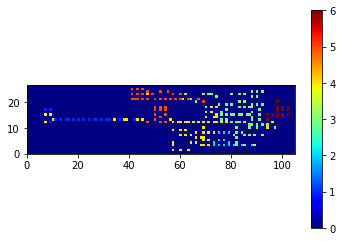

In [131]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
data_plot = (data[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar()

In [127]:
data = np.genfromtxt('zone_compare1_nosort_np.csv', delimiter=',')
print(data)
print(len(data))

[[ 39.   7.  12.   3.]
 [ 39.   7.  15.   3.]
 [ 37.   7.  17.   1.]
 ...
 [ 42. 102.  26.   0.]
 [ 42. 103.  26.   0.]
 [ 42. 104.  26.   0.]]
2835


In [81]:
'''
print(data)
zone_train = np.array([],[])
for i in range(0,len(data)):
    if np.where(data[i,3] == 0):
        zone_train = data[i,1:4]
'''



[[ 39.   0.   0.   0.]
 [ 39.   1.   0.   0.]
 [ 39.   2.   0.   0.]
 ...
 [ 42. 102.  26.   0.]
 [ 42. 103.  26.   0.]
 [ 42. 104.  26.   0.]]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [98]:
X = data[:218,1:3]
y = data[:218,3]
modelClassifier = KNeighborsClassifier(n_neighbors=3)
pci_pred = modelClassifier.fit(X, y).predict(data[219:,1:3])
print(pci_pred)
print("len(pci_pred)==",len(pci_pred))
data[219:,3] = pci_pred
print (data)
np.savetxt('./result_pci/zone_knn_result.csv', data, delimiter=',', fmt='%f')

df = pd.DataFrame(data,columns = ['pci','x','y','zone'])
print (df.tail())
df = df.sort_values(by=['y','x'])
print (df.tail())
df.to_csv('./result_pci/zone_knn_result_sort.csv')
df=df.values

[3. 3. 3. ... 5. 5. 5.]
len(pci_pred)== 2616
[[ 39.   7.  12.   3.]
 [ 39.   7.  15.   3.]
 [ 37.   7.  17.   1.]
 ...
 [ 42. 102.  26.   5.]
 [ 42. 103.  26.   5.]
 [ 42. 104.  26.   5.]]
       pci      x     y  zone
2830  42.0  100.0  26.0   5.0
2831  42.0  101.0  26.0   5.0
2832  42.0  102.0  26.0   5.0
2833  42.0  103.0  26.0   5.0
2834  42.0  104.0  26.0   5.0
       pci      x     y  zone
2830  42.0  100.0  26.0   5.0
2831  42.0  101.0  26.0   5.0
2832  42.0  102.0  26.0   5.0
2833  42.0  103.0  26.0   5.0
2834  42.0  104.0  26.0   5.0


[[0. 3. 3. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 2.]
 ...
 [1. 1. 1. ... 5. 5. 5.]
 [1. 1. 1. ... 5. 5. 5.]
 [1. 1. 1. ... 5. 5. 5.]]


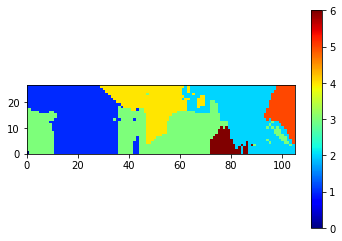

In [99]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
data_plot = (df[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar()

In [7]:
X = train_part_test[:,0:2]
y = train_part_test[:,2]
modelClassifier = KNeighborsClassifier(n_neighbors=3)
pci_pred = modelClassifier.fit(X, y).predict(data_test[:,0:2])
print(pci_pred)
n_accuracy = 0
for i in range(len(pci_pred)):
    if pci_pred[i] == data_test[i,2]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(pci_pred))
acc = n_accuracy/(len(pci_pred))
print('pci accuracy: ',acc )

[37. 41. 39. ... 38. 38. 38.]
n_accuracy_pci== 4729
len(pci_pred)== 5691
pci accuracy:  0.8309611667545247


Predict pci and plot pci map
===

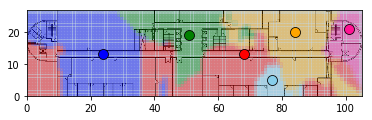

In [8]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Mutiple zone to train model then save to file
===

In [25]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
pci_result_zone = np.delete(pci_result_zone,0,axis=0)
print (pci_result_zone)


[[  0.   0.  39.  nan]
 [  1.   0.  39.  nan]
 [  2.   0.  39.  nan]
 ...
 [102.  26.  42.  nan]
 [103.  26.  42.  nan]
 [104.  26.  42.  nan]]


In [114]:
pci_result_zone_all = np.genfromtxt('./result_pci/zone_knn_result_sort_np.csv', delimiter=',')
print (pci_result_zone_all)
print (len(pci_result_zone_all))

[[  0.   0.  39.   3.]
 [  1.   0.  39.   3.]
 [  2.   0.  39.   3.]
 ...
 [102.  26.  42.   5.]
 [103.  26.  42.   5.]
 [104.  26.  42.   5.]]
2835


In [133]:
for i in range(1,7):
    #print(i)
    zone = np.array([])
    zone = np.where(train_part_test[:,5] == i)
    #print(train_part_test[zone[0],:])
    print("zone == ",zone[0])
    X = train_part_test[zone[0],0:3]
    y = train_part_test[zone[0],3]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X_train, y_train)
    filename = 'finalized_model_' + str(i) +'-' + '.sav'
    pickle.dump(model, open(filename, 'wb'))
    y_pred = model.predict(X_test)
    #print(pci_result_zone[:,2])
    zone_allpoint = np.where(pci_result_zone_all[:,3] == i)
    print (len(pci_result_zone_all))
    #predict_zone = model.predict(pci_result_zone[zone_allpoint[0],0:3])
    predict_zone = model.predict(pci_result_zone_all[zone_allpoint[0],0:3])
    #print(zone_allpoint[0]+1)
    print(len(predict_zone))
    #predict_zone_every = np.append(pci_result_zone[zone_allpoint[0],0:3],predict_zone)
    name = './zone_result/zone_predict_' + str(i) +'.csv'
    df_loc = pd.DataFrame(pci_result_zone_all[zone_allpoint[0],0:3],columns=['x','y','pci'])
    df_rsrp = pd.DataFrame(predict_zone,columns=['rsrp'])
    df_result = pd.concat([df_loc,df_rsrp],axis=1)
    #print(str(i)+"==="+"df==",df)
    df_result.to_csv(name,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    print("[MSE]==",mean_squared_error(y_test, y_pred))
    print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    loaded_model = pickle.load(open(filename, 'rb'))
df1 = pd.read_csv('./zone_result/zone_predict_1.csv')
df2 = pd.read_csv('./zone_result/zone_predict_2.csv')  
df3 = pd.read_csv('./zone_result/zone_predict_3.csv')  
df4 = pd.read_csv('./zone_result/zone_predict_4.csv')  
df5 = pd.read_csv('./zone_result/zone_predict_5.csv')
df6 = pd.read_csv('./zone_result/zone_predict_6.csv')  
df_merge_list = [df1,df2,df3,df4,df5,df6]
df_merge_result = pd.concat(df_merge_list)
df_merge_result.to_csv('./zone_result/zone_predict_total.csv', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])
'''
    zone_allpoint = np.where(pci_result_zone[:,3] == i)
    #rint (zone_allpoint)
    print(pci_result_zone[zone_allpoint,0:3])
    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])
    name = 'zone_predict_' + str(i) +'-' + '.csv'
    np.savetxt(name, predict_zone, delimiter=',', fmt='%f')
    result = loaded_model.score(X_test, y_test)
    #print("load result==",result)
'''

zone ==  [ 2  3  4  7  8  9 10 11 12 13 14 15 16 17 18 19 21 27]
2835
778
[MSE]== 40.43029243399941
[RMSE]== 6.3584819284165155
zone ==  [ 75  79  85  87  98 104 105 107 113 120 127 128 129 130 135 137 138 139
 143 144 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 163 164 165 166 167 168 169 170 171 172 173 174 175 177 178 179 180 181
 182 183 184 186 187 188 189 190 191 192 193 194 195 196 197 198 199 205]
2835
640
[MSE]== 27.662035655931277
[RMSE]== 5.25947104335895
zone ==  [  0   1   5   6  20  22  23  31  33  39  59  61  62  63  64  65  68  69
  70  73  74  76  77  78  81  82  83  84  86  88  89  90  91  93  94  95
  97  99 100 101 102 103 106 108 109 110 111 112 114 115 118 119 121 122
 123 131 136 185 200 204]
2835
767
[MSE]== 14.17611766063176
[RMSE]== 3.7651185453623848
zone ==  [24 25 26 28 29 30 32 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 60 66 67 71 72 80 92 96]
2835
390
[MSE]== 27.679144643652982
[RMSE]== 5.261097285134821

'\n    zone_allpoint = np.where(pci_result_zone[:,3] == i)\n    #rint (zone_allpoint)\n    print(pci_result_zone[zone_allpoint,0:3])\n    predict_zone = loaded_model.predict(pci_result_zone[zone_allpoint,0:3])\n    name = \'zone_predict_\' + str(i) +\'-\' + \'.csv\'\n    np.savetxt(name, predict_zone, delimiter=\',\', fmt=\'%f\')\n    result = loaded_model.score(X_test, y_test)\n    #print("load result==",result)\n'

Plot rsrp map
===

[[   0.          0.         39.       -120.379006]
 [   1.          0.         39.       -120.379006]
 [   2.          0.         39.       -120.379006]
 ...
 [ 102.         26.         42.        -73.663379]
 [ 103.         26.         42.        -73.663379]
 [ 104.         26.         42.        -73.663379]]
2835


"\ndf_merge_result.drop(['pci'])\ndf_merge_result_array = df_merge_result[1:,:].values\nprint(df_merge_result_array)\nheatmap_rsrp = plt.pcolor(df_merge_result,cmap='jet',alpha=1)\n"

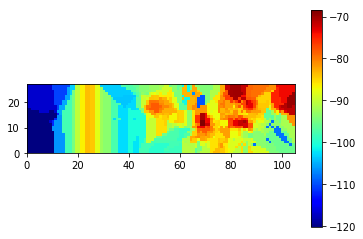

In [116]:
df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
df_total_sort = df_total.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()
#sns.heatmap(rsrp_map_pd, cmap = 'jet')
'''
df_merge_result.drop(['pci'])
df_merge_result_array = df_merge_result[1:,:].values
print(df_merge_result_array)
heatmap_rsrp = plt.pcolor(df_merge_result,cmap='jet',alpha=1)
'''


Merge to 51-5F map
===

In [132]:
#bk = Image.open('5f_map.png')
bk = Image.open('823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')


(623, 411)
(432, 288)
